In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
#load datasets
sales_df = pd.read_csv("C:\\Users\\Seher\\Desktop\\DA-TASK-7\\data\\sales_data.csv")
churn_df = pd.read_csv("C:\\Users\\Seher\\Desktop\\DA-TASK-7\\data\\customer_churn.csv")

sales_df.head(), churn_df.head()

(         Date     Product  Quantity  Price Customer_ID Region  Total_Sales
 0  2024-01-01       Phone         7  37300     CUST001   East       261100
 1  2024-01-02  Headphones         4  15406     CUST002  North        61624
 2  2024-01-03       Phone         2  21746     CUST003   West        43492
 3  2024-01-04  Headphones         1  30895     CUST004   East        30895
 4  2024-01-05      Laptop         8  39835     CUST005  North       318680,
   CustomerID  Tenure  MonthlyCharges  TotalCharges        Contract  \
 0     C00001       6              64          1540        One year   
 1     C00002      21             113          1753  Month-to-month   
 2     C00003      27              31          1455        Two year   
 3     C00004      53              29          7150  Month-to-month   
 4     C00005      16             185          1023        One year   
 
       PaymentMethod PaperlessBilling  SeniorCitizen  Churn  
 0       Credit Card               No              1 

In [4]:
#descriptive stats
sales_stats = sales_df[['Quantity', 'Price', 'Total_Sales']].describe()

sales_stats

,Quantity,Price,Total_Sales
count,100.000000,100.000000,100.000000
mean,4.780000,25808.510000,123650.480000
std,2.588163,13917.630242,100161.085275
min,1.000000,1308.000000,6540.000000
25%,2.750000,14965.250000,39517.500000
50%,5.000000,24192.000000,97955.500000
75%,7.000000,38682.250000,175792.500000
max,9.000000,49930.000000,373932.000000


In [5]:
mean_sales = sales_df['Total_Sales'].mean()
median_sales = sales_df['Total_Sales'].median()
mode_sales = sales_df['Total_Sales'].mode()[0]
std_sales = sales_df['Total_Sales'].std()

mean_sales, median_sales, mode_sales, std_sales

(123650.48, 97955.5, 6540, 100161.08527499213)

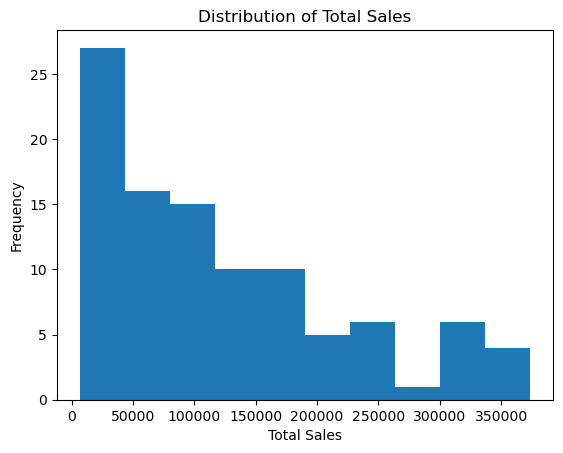

In [6]:
#distribution and normality test
plt.hist(sales_df['Total_Sales'], bins=10)
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()

In [7]:
stats.shapiro(sales_df['Total_Sales'])

ShapiroResult(statistic=0.8989262036779536, pvalue=1.2590767205714734e-06)

In [8]:
#correlation analysis
correlation_matrix = sales_df[['Quantity', 'Price', 'Total_Sales']].corr()
correlation_matrix

,Quantity,Price,Total_Sales
Quantity,1.000000,0.008014,0.688107
Price,0.008014,1.000000,0.646131
Total_Sales,0.688107,0.646131,1.000000


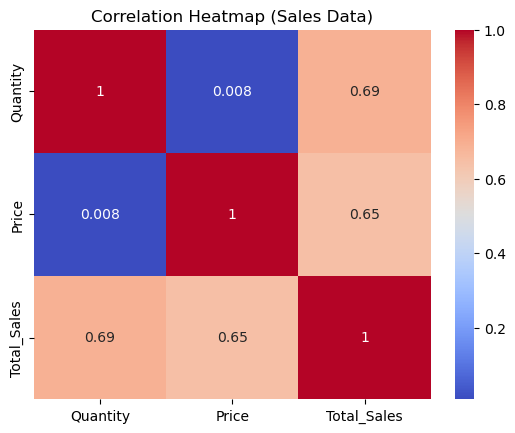

In [9]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Sales Data)")
plt.show()

In [10]:
#hypothesis testing
#test 1- one sample t-test
stats.ttest_1samp(sales_df['Total_Sales'], sales_df['Total_Sales'].mean())

TtestResult(statistic=0.0, pvalue=1.0, df=99)

In [11]:
#test 2- independent t-test (region wise sales)
north = sales_df[sales_df['Region'] == 'North']['Total_Sales']
south = sales_df[sales_df['Region'] == 'South']['Total_Sales']

stats.ttest_ind(north, south, equal_var=False)

TtestResult(statistic=0.12990909486062338, pvalue=0.8971521399586031, df=50.72549680004771)

In [12]:
#test 3- churn vs non-churn monthly charges
churned = churn_df[churn_df['Churn'] == 'Yes']['MonthlyCharges']
not_churned = churn_df[churn_df['Churn'] == 'No']['MonthlyCharges']

stats.ttest_ind(churned, not_churned, equal_var=False)

TtestResult(statistic=nan, pvalue=nan, df=nan)

In [13]:
#95% confidence interval
mean = sales_df['Total_Sales'].mean()
sem = stats.sem(sales_df['Total_Sales'])

confidence_interval = stats.t.interval(0.95, len(sales_df)-1, mean, sem)
confidence_interval

(103776.34767158539, 143524.6123284146)

In [14]:
#regression analysis
X = sales_df[['Quantity', 'Price']]
y = sales_df['Total_Sales']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Sales   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     369.3
Date:                Wed, 25 Feb 2026   Prob (F-statistic):           4.40e-46
Time:                        20:03:46   Log-Likelihood:                -1185.2
No. Observations:                 100   AIC:                             2376.
Df Residuals:                      97   BIC:                             2384.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.217e+05   9668.294    -12.586      0.000   -1.41e+05   -1.02e+05
Quantity    2.643e+04   1338.869     19.741      0.000    2.38e+04    2.91e+04
Price          4.6106      0.249     18.518      0.000       4.116       5.105
==============================================================================
Omnibus:                        1.152   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                1.077
Skew:                           0.086   Prob(JB):                        0.584
Kurtosis:                       2.522   Cond. No.                     8.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#buisness insights
print("Sales increase with higher quantity and price.")
print("Certain regions show stronger sales performance.")
print("Customers with higher monthly charges are more likely to churn.")
print("Targeted pricing and retention strategies can improve revenue.")

Sales increase with higher quantity and price.
Certain regions show stronger sales performance.
Customers with higher monthly charges are more likely to churn.
Targeted pricing and retention strategies can improve revenue.
